In [12]:
import pandas as pd
import numpy as np

In [16]:
df_red=pd.read_csv('wine+quality/winequality-red.csv')
df_white=pd.read_csv('wine+quality/winequality-white.csv')

In [17]:
df_red['label']=0
df_white['label']=1
df=pd.concat([df_red,df_white],ignore_index=True)

In [18]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(df.drop('label',axis=1))
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])

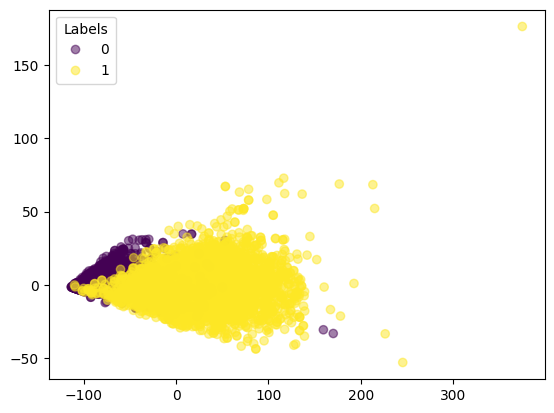

In [20]:
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(df['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

In [21]:
# apply kmeans on this sampled points
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score
kmeans = KMeans(n_clusters=2, random_state=0)

In [22]:
rand_score(df["label"],kmeans.fit_predict(df.drop('label',axis=1)))

0.6630752655071571

In [25]:
# take a mean of all the pixel values and return 1x
df_grouped = df.mean()
df_grouped.drop('label', inplace=True)

In [26]:
# Sum of deviation from mean
df['deviation'] = df.drop('label', axis=1).apply(lambda x: np.sum(np.abs(x - df_grouped)**2), axis=1)
sum=df['deviation'].sum()
sum

22972202.73510993

In [28]:
# Defining m
m=600
q=[0 for i in range(6497)]
for i in range(6497):
    q[i]= 0.5*(df['deviation'][i]/sum + (1/70000))

weight=[0 for i in range(6497)]
for i in range(6497):
    weight[i]=1/(m*q[i])

In [29]:
df = df.drop('deviation',axis=1)

In [30]:
sampled_points = df.sample(n=m, weights=q, replace=True)
weight = [weight[i] for i in sampled_points.index]

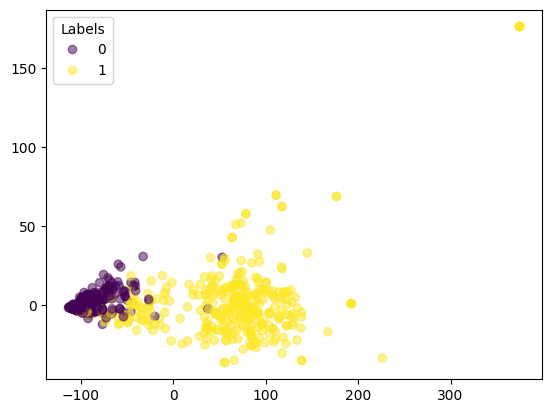

In [31]:
data_2d = pca.transform(sampled_points.drop('label',axis=1))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=sampled_points['label'], cmap='viridis', alpha=0.5)
unique_labels = np.unique(sampled_points['label'])
labels = label_encoder.transform(sampled_points['label'])
label_names = label_encoder.inverse_transform(unique_labels)
legend = plt.legend(*scatter.legend_elements(), title='Labels')
legend.texts = [plt.Text(0, 0, name) for name in label_names]
plt.show()

In [32]:
rand_score(kmeans.fit_predict(sampled_points.drop('label', axis=1),sample_weight=weight),sampled_points['label'])

0.8117362270450751

In [33]:
rand_score(kmeans.predict(df.drop('label', axis=1)),df['label'])

0.590627656114114